# Prueba Intertrimestral

**Nombre:**  Guadalupe
**Apellidos:**  Martínez Blanco

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score)

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [16]:
def imc(weight, height): #peso en kg altura en m
    imc = weight / (height ** 2)
    return round(imc, 2)

In [17]:
miimc = imc(50,1.62)
miimc

19.05

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [18]:
def saludable(imcValue):
    if imcValue < 18.5:
        return "Bajo peso"
    elif 18.5 <= imcValue <= 24.9:
        return "Saludable"
    else:
        return "Sobrepeso"

In [19]:
saludable(imc(100,1.5))

'Sobrepeso'

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [20]:
pesos = np.random.uniform(50, 100, 10)
alturas = np.random.uniform(1.5, 1.9, 10)

imcData = pd.DataFrame({
    "peso": pesos,
    "altura": alturas
})

imc_vals = []
for i in range(len(imcData)):
    p = imcData.loc[i, "peso"]
    h = imcData.loc[i, "altura"]
    imc_vals.append(imc(p, h))

imcData["imc"] = imc_vals

categorias = []
for valor in imcData["imc"]:
    categorias.append(saludable(valor))

imcData["categoria"] = categorias

print(imcData.head())
print(imcData.dtypes)


        peso    altura    imc  categoria
0  99.921911  1.774012  31.75  Sobrepeso
1  68.421530  1.586743  27.18  Sobrepeso
2  98.437499  1.591676  38.86  Sobrepeso
3  72.418184  1.513253  31.62  Sobrepeso
4  89.532072  1.870695  25.58  Sobrepeso
peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [21]:
class HealthTools:
    def imc(weight, height): #peso en kg altura en m
        imc = weight / (height ** 2)
        return round(imc, 2)

    def saludable(imcValue):
        if imcValue < 18.5:
            return "Bajo peso"
        elif 18.5 <= imcValue <= 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"


    def generar_dataframe(cls, pesos, alturas):
        df = pd.DataFrame({
            "peso": pesos,
            "altura": alturas
        })

        imc_vals = []
        for i in range(len(df)):
            p = df.loc[i, "peso"]
            h = df.loc[i, "altura"]
            imc_vals.append(cls.imc(p, h))
        df["imc"] = imc_vals

        categorias = []
        for valor in df["imc"]:
            categorias.append(cls.saludable(valor))
        df["categoria"] = categorias

        return df

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [22]:
lifeStyleData = pd.read_csv("Final_data.csv")

print(lifeStyleData.head())

print("\nNúmero de filas y columnas:", lifeStyleData.shape)


     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [23]:
def describeData(dataFrame):
    informacion = pd.DataFrame({
        "Tipo de dato": dataFrame.dtypes,
        "Nulos": dataFrame.isnull().sum(),
    })
    informacion["% Nulos"] = (informacion["Nulos"] / len(dataFrame)) * 100
    return informacion

In [24]:
describeData(lifeStyleData)

,Tipo de dato,Nulos,% Nulos
Age,float64,0,0.000
Gender,object,0,0.000
Weight (kg),float64,0,0.000
Height (m),float64,0,0.000
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
Resting_BPM,float64,0,0.000
Session_Duration (hours),float64,0,0.000
Calories_Burned,float64,0,0.000
Workout_Type,object,0,0.000


c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [25]:
descripcion = describeData(lifeStyleData)
print(descripcion)

                               Tipo de dato  Nulos  % Nulos
Age                                 float64      0    0.000
Gender                               object      0    0.000
Weight (kg)                         float64      0    0.000
Height (m)                          float64      0    0.000
Max_BPM                             float64      1    0.005
Avg_BPM                             float64      1    0.005
Resting_BPM                         float64      0    0.000
Session_Duration (hours)            float64      0    0.000
Calories_Burned                     float64      0    0.000
Workout_Type                         object      0    0.000
Fat_Percentage                      float64      0    0.000
Water_Intake (liters)               float64      0    0.000
Workout_Frequency (days/week)       float64      0    0.000
Experience_Level                    float64      0    0.000
BMI                                 float64      0    0.000
Daily meals frequency               floa

Las variables que parecen tener más valores faltantes (NAs) son: Max_BPM, Avg_BPM y cholesterol_mg. El resto de variables por el contrario no presentan ningún valor faltante.

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

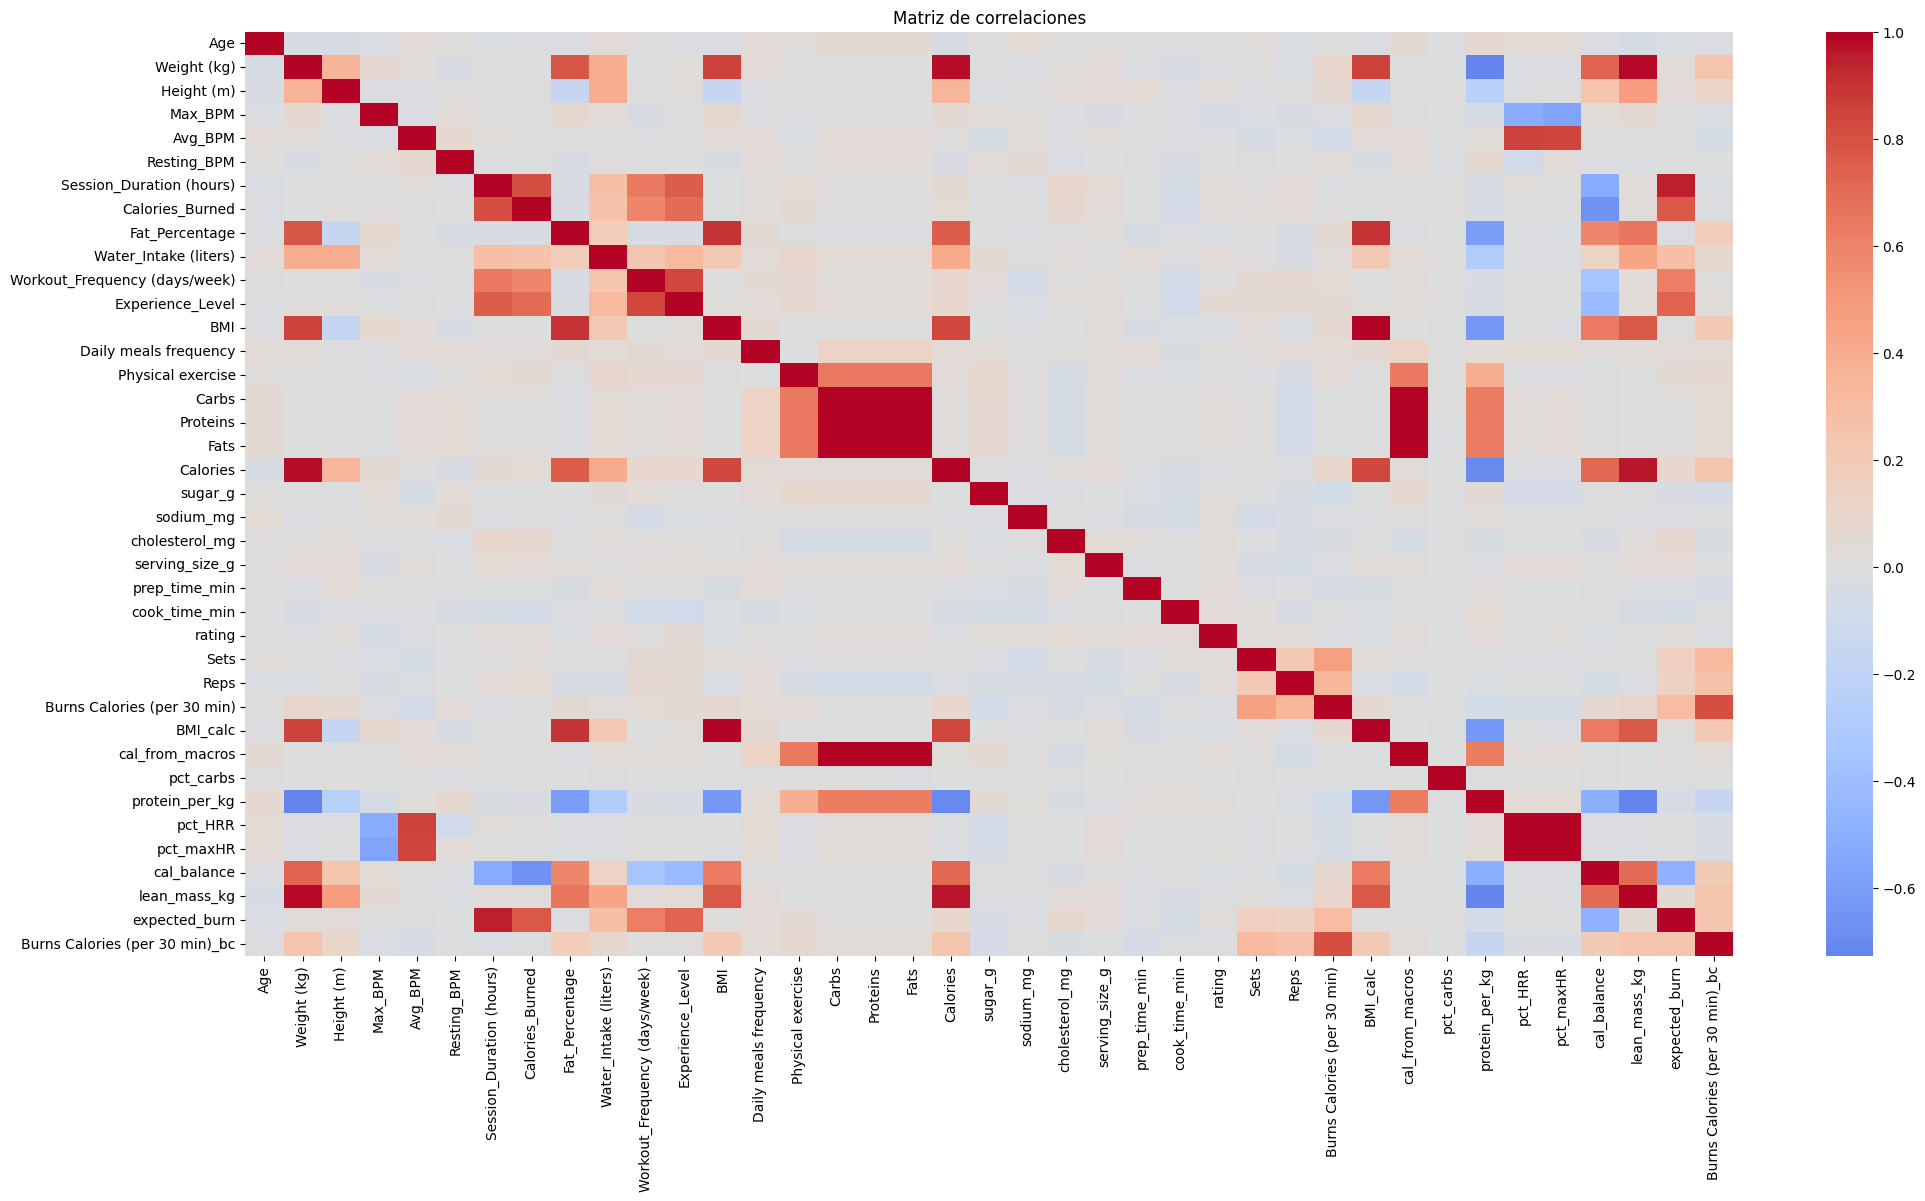

In [26]:
columnas_numericas = lifeStyleData.select_dtypes(include=np.number)
correlacion = columnas_numericas.corr()

plt.figure(figsize=(24,12))
sns.heatmap(correlacion, cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones")
plt.show()

Las variables que tienen una fuerte correlación positiva con el BMI son el peso (Weight), el porcentaje de grasa, las calorias, el BMI calculado (BMI_calc), el calc_balance y el lean_mass_kg.
En cambio, las que tienen una fuerte correlación negativa son: protein_per_kg y aunque algo menos, la altura.

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [27]:
# Variable objetivo
targetVar = "BMI"
X = lifeStyleData[["Fat_Percentage", "protein_per_kg", "Calories"]]#variables mas correladas con BMI que no sean peso y altura
y = lifeStyleData[targetVar]

b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Regresión Lineal: R^2:", round(r2_lr, 3), " MSE:", round(mse_lr, 3))

Regresión Lineal: R^2: 0.866  MSE: 6.063


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [30]:
rf_reg = RandomForestRegressor(random_state=123, n_estimators=100)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest : R^2:", round(r2_rf, 3), " MSE:", round(mse_rf, 3))

Random Forest : R^2: 0.911  MSE: 4.051


Si comparamos ambos modelos, vemos que el Random Forest tiene mejor rendimiento porque tiene un R^2 (coeficiente de determinación) más alto, por lo tanto predice mejor la variabilidad de los datos. Además, tiene un MSE (error cuadratico medio) más bajo, lo que indica que sus predicciones están más cerca de los valores reales y son mas precisos.

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [31]:
lifeStyleData['bmiHealthy'] = np.where((lifeStyleData['BMI'] >= 18.5) & (lifeStyleData['BMI'] <= 24.9), 1, 0)
lifeStyleData.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,bmiHealthy
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,1
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,1
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,1
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,0
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [32]:
X = lifeStyleData[["Fat_Percentage", "protein_per_kg", "Calories"]]
y = lifeStyleData["bmiHealthy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [33]:
predictions = lr.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de confusion:\n", conf_matrix)


Classification report
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      3723
           1       0.47      0.32      0.38      2277

    accuracy                           0.61      6000
   macro avg       0.56      0.55      0.55      6000
weighted avg       0.58      0.61      0.59      6000

Accuracy: 0.6066666666666667
Matriz de confusion:
 [[2915  808]
 [1552  725]]


Estamos prediciendo la probabilidad de tener un bmi saludable (1) o poco saludable (0), variable binaria.

Hemos entrenado un de clasificación de Regresión Logística (LR) utilizando un 70% de training y un 30% de test del juego de datos.

Las métricas del modelo que utilizamos para ver los resultados son la accuracy y el f1-score por categoría. El accuracy de LR es de un 61%, es aceptable pero un poco baja ya que unicamente el 61% de predicciones son correctas en todo el test. Ademas el f1 socre de la clase 1 (healthy BMI) es unicamente del 38% lo cual es banatante bajo.

El modelo predice bien la clase notHealthyBMI (0), pero tiene problemas con la clase healthyBMI (1).

Para mejorar este modelo lo que se podria hacer es rebalancear las clase, poniendo mas clases de tipo 1 y menos del tipo 0. Otra opción sería utilizar otro modelo que sea algo más robusto como un RandomForest o también se podría ajustar el threshold de clasificación para aumentar el recall de la clase 1.

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [34]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr.coef_[0]
})

coef_df['Influencia'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Influencia', ascending=False)
print(coef_df)

         Variable  Coeficiente  Influencia
1  protein_per_kg    -0.775733    0.775733
0  Fat_Percentage    -0.138334    0.138334
2        Calories    -0.000800    0.000800


## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



El modelo que fue más eficaz fue el de Regresión Lineal, ya que con el se obtienen mejores resultados que adaptando los datos a que sea un modelo de clasificación con Regresión Logistica. El modelo de Regresión Lineal presenta buenos resultados en validación, ya que con el se obtiene un R^2 del 91% y un error relativamente bajo (MSE: 4.051). Por el contrario en clasificacion las clases estan poco balanceadas y funcionaría mejor con otro tipo de modelo como RandomForest.
Los hábitos que parecen tener una mayor relación con la salud son el porcentaje de grasa en el cuerto y el nivel de proteina por kg. Estas dos variables marcan en gran medida la salud de la gente, y son principalmente las dos que hay que tener más en cuenta.
Para mejorar, si tuviese más tiempo compararía con otros tipos de modelos de regresión como un RandomForest o KNN para ver su performance sobre los datos de forma que me pueda quedar con el que mejores resultados presente en validación y menor error me de en test.